# Analiza danych

## Wczytywanie danych

Import podstawowych paczek

In [2]:
import pandas as pd
import numpy as np

Wczytywanie wstępnie przetworzonych danych. Parametry są reprezentowane przez dane statystyczne w zagregowancyh przedziałach czasowych. To podejście **JEST SUPER, BO...**

In [22]:
df = pd.read_csv("aggregated.csv")
df.head()

,index,czas,temp,001tix01075.daca.pv_min,001tix01075.daca.pv_max,001tix01075.daca.pv_mean,001tix01075.daca.pv_std,001tix01075.daca.pv_skew,001tix01075.daca.pv_kurt,001tix01074.daca.pv_min,...,001tix01070.daca.pv_mean,001tix01070.daca.pv_std,001tix01070.daca.pv_skew,001tix01070.daca.pv_kurt,001uxm0rf01.daca.pv_min,001uxm0rf01.daca.pv_max,001uxm0rf01.daca.pv_mean,001uxm0rf01.daca.pv_std,001uxm0rf01.daca.pv_skew,001uxm0rf01.daca.pv_kurt
0,True,2020-10-01 00:00:00,1297,460.520729,460.571068,460.545898,0.014901,0.000000,-1.200008,407.281123,...,372.441726,0.019022,-0.000002,-1.200001,92.092048,92.137028,92.105226,0.013063,1.336639,0.534880
1,True,2020-10-01 01:00:00,1295,460.451847,460.519875,460.488440,0.020786,-0.157479,-1.272132,407.161067,...,372.374947,0.020700,-0.106689,-1.193712,92.091896,92.117310,92.105459,0.009096,-0.518235,-1.300802
2,True,2020-10-01 02:00:00,1303,460.375080,460.450567,460.412823,0.022345,0.000000,-1.200003,407.033107,...,372.299606,0.022345,0.000000,-1.200003,92.081750,92.091896,92.087027,0.003116,-0.012601,-1.219916
3,True,2020-10-01 02:30:00,1302,460.336696,460.412184,460.374440,0.022345,0.000000,-1.199996,406.969132,...,372.261223,0.022345,0.000000,-1.199996,92.084887,92.096837,92.090631,0.003202,0.074313,-0.756761
4,True,2020-10-01 03:00:00,1303,460.298313,460.373800,460.336057,0.022345,0.000000,-1.200003,406.905168,...,372.232435,0.012490,0.953095,-0.573998,92.081877,92.096837,92.090106,0.003766,-0.235411,-0.423838


## Czyszczenie danych

Sprawdzenie, czy brakuje jakichś wartości.

In [4]:
df.isnull().values.any()

False

Dane są kompletne, więc nie ma potrzeby ich uzupełnienia.

## Analiza temperatury

In [5]:
df.temp.describe()

count    11383.000000
mean      1303.389177
std          7.532218
min       1190.000000
25%       1300.000000
50%       1304.000000
75%       1308.000000
max       1338.000000
Name: temp, dtype: float64

<AxesSubplot:>

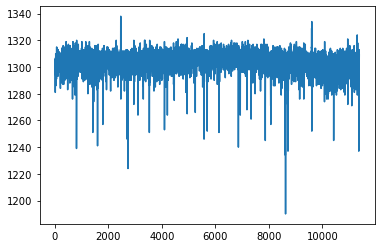

In [6]:
df.temp.plot()

> Co oznacza sytuacja, kiedy regulator liw1 pokazuje 0, a liw2 normalną wartość? Czy występują one tylko w sytuacji rozruchu/postoju i nie powinny występować podczas normalnej pracy pieca?
Czy liw3 może przez dłuższy czas nie pracować?

MENTOR - Jacek Skrzyniarz  2:55 PM
> Tak to jest bardzo dobra analiza, , takie sytuacje występują w trakcie rozruchu i zatrzymania pieca zawiesinowego. Co do LIW 3 okresowo piec prażalniczy musi również przechodzi postoje remontowe i serwisowe,  w związku z tym w okresie postoju prażalnika nie podajemy prażonego koncentratu miedzi gdyż  go po prostu nie ma.

In [31]:
# df['001fcx00211.pv'] == 0
# '001fcx00221.pv'
df.loc[(df['001fcx00211.pv_mean'] == 10) & (df['001fcx00221.pv_mean'] != 0)]
df.loc[(df['001fcx00211.pv_mean'] <= 1) & (df['001fcx00231.pv_mean'] == 0)]

,index,czas,temp,001tix01075.daca.pv_min,001tix01075.daca.pv_max,001tix01075.daca.pv_mean,001tix01075.daca.pv_std,001tix01075.daca.pv_skew,001tix01075.daca.pv_kurt,001tix01074.daca.pv_min,...,001tix01070.daca.pv_mean,001tix01070.daca.pv_std,001tix01070.daca.pv_skew,001tix01070.daca.pv_kurt,001uxm0rf01.daca.pv_min,001uxm0rf01.daca.pv_max,001uxm0rf01.daca.pv_mean,001uxm0rf01.daca.pv_std,001uxm0rf01.daca.pv_skew,001uxm0rf01.daca.pv_kurt
656,True,2020-10-27 09:00:00,1290,461.440741,461.541407,461.491074,0.029797,-2.937878e-06,-1.200002,407.322441,...,369.916547,0.022362,-2.352802e-07,-1.200001,92.076546,92.079554,92.077161,0.000946,1.293411e+00,0.234105
806,True,2020-11-02 17:00:00,1302,464.183584,464.369320,464.273529,0.054608,8.248866e-02,-1.167608,411.454810,...,372.772938,0.031617,-1.956043e-01,-0.914938,92.069183,92.079240,92.074211,0.002977,-2.151254e-06,-1.200002
1417,True,2020-11-29 23:00:00,1251,458.494844,458.621759,458.530771,0.039563,9.996071e-01,-0.444698,403.667297,...,368.746848,0.066960,4.762496e-03,-1.206306,92.127868,92.148170,92.138026,0.007570,2.779605e-01,-1.582270
1593,True,2020-12-07 09:00:00,1286,460.455076,460.597725,460.510302,0.041384,6.156332e-01,-0.785413,406.431151,...,370.237263,0.007652,-9.713545e-02,-1.047231,92.123669,92.136250,92.129960,0.003724,-2.157188e-06,-1.199993
1792,True,2020-12-15 09:00:00,1286,458.530908,458.732238,458.631573,0.059595,-2.870200e-06,-1.200001,403.535941,...,367.108643,0.052142,3.668486e-12,-1.200002,92.143854,92.146371,92.145112,0.000745,2.263521e-05,-1.200017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9606,True,2021-11-15 13:00:00,1334,459.271191,459.548023,459.409607,0.081944,0.000000e+00,-1.200000,403.125674,...,375.611731,0.022353,-7.208535e-06,-1.200004,97.165996,97.202138,97.179348,0.012122,4.203780e-01,-1.266702
10421,True,2021-12-21 08:00:00,1305,458.354119,458.494878,458.429660,0.040565,-1.824504e-01,-1.069118,404.206736,...,373.984342,0.044070,-3.490204e-01,-0.912295,97.151550,97.205707,97.163269,0.014523,1.186662e+00,0.615568
10422,True,2021-12-21 08:30:00,1289,458.264542,458.430898,458.351602,0.050633,-7.564421e-02,-1.259480,404.078793,...,373.892183,0.064075,-1.152970e-01,-1.284270,97.153224,97.205707,97.168376,0.011245,1.561644e+00,2.317429
10951,True,2022-01-14 08:00:00,1317,460.679857,460.780477,460.730167,0.029784,1.236720e-07,-1.199997,406.185549,...,377.221742,0.007448,4.719245e-08,-1.199993,98.028357,98.074908,98.051632,0.013779,8.212033e-07,-1.200000


In [12]:
df['001fcx00211.pv_mean']

0        54.770835
1        54.839065
2        54.871684
3        54.917290
4        54.894367
           ...    
11378    58.957835
11379    58.938657
11380    58.936257
11381    58.292240
11382    57.972474
Name: 001fcx00211.pv_mean, Length: 11383, dtype: float64

Na wykresie temperatury widać wiele wartości odstających (outliers). Przyjrzyjmy się im bliżej.

### Outliers

Zbadamy bliżej zbiór wartości odstających, za który przyjmujemy wartości o `z score` większym niż 3.

In [23]:
from scipy import stats
z = np.abs(stats.zscore(df.temp))
threshold = 3
big_z = np.where(z > 3)
len(*big_z)

128

Widzimy, że jest 128 takich wartości.

In [24]:
idxs = big_z[0]
# without_o = df.drop(idxs)
# without_o.to_csv("without_outliers.csv")
# without_o.shape
outliers = df.iloc[idxs]
outliers = outliers.drop('index', axis=1)
outliers['001fcx00211.pv_mean'].sort_values()
sum(outliers['001fcx00211.pv_mean'] == 0)

20

Sprawdzamy korelacje parametrów wartości odległych z temperaturą.

<AxesSubplot:>

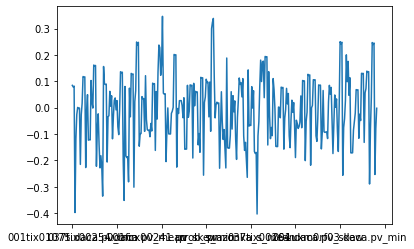

In [94]:
cor = outliers.drop('temp', axis=1).corrwith(outliers.temp)
cor.plot()

Widać, że żadna korelacja nie jest znacząca?

In [100]:
print(cor.sort_values())

001tix01076.daca.pv_std    -0.402988
001tix01075.daca.pv_std    -0.397445
001tix01085.daca.pv_skew   -0.351404
001tir01361.daca.pv_skew   -0.335184
001tix01064.daca.pv_std    -0.301291
                              ...   
001uxm0rf03.daca.pv_min     0.250441
001fcx00231.pv_min          0.299759
001fcx00231.pv_max          0.324230
001fcx00231.pv_mean         0.338649
001fcx00241.pv_kurt         0.346594
Length: 342, dtype: float64


In [89]:
print(cor['001fcx00211.pv_mean'])
print(cor['001fcx00221.pv_mean'])

0.08824679467371278
0.09874972147936047


Wyróżniamy wartości odległe

In [116]:
df['is_outlier'] = 0
df.loc[idxs,'is_outlier'] = 1
df.is_outlier.sum()

128

In [122]:
ncor = df.corrwith(df['001fcx00221.pv_mean'])#.plot()
ncor['is_outlier']

-0.1706607306949974

Korelacje outliersów - regulator nadawy koncentratu, prawdopodobnie to zatrzymanie pieca - brak źródła ciepła.

Wiemy, że piec jest serwisowany X razy w miesiącu **SPRAWDZIĆ**, wieć wnioskujemy, że to jest przyczyną dużych spadków temperatur.

Z dotychczasowej analizy danych nie wynika, by jakiś parametr miał znaczący wpływ na gwałtowny spadek temperatury w piecu. Wiemy, że piec zawiesinowy jest serwisowany X razy w miesiącu **SPRAWDZIĆ**, więc wnioskujemy, że to jest anomalii. Ponieważ jest to wydarzenie planowe, nie ma potrzeby przewidywania go - kontroler wie o nim wcześniej i dostosuje odpowiednio parametry. W takim razie możemy wykluczyć odległe wartości i wytrenować model na danych z regularnej pracy Pieca Zawiesionowego Huty Miedzi Głogów I.

## Badanie korelacji

### Macierz korelacji dla wszystkich danych

In [70]:
def show_correlation(df: pd.DataFrame):
    cor_matrix = df.corr()
    return cor_matrix.style.background_gradient(cmap='coolwarm')

#show_correlation(df)

In [ ]:
show_correlation(outliers)

In [7]:
df.corrwith(df.temp)
#cm.style.background_gradient(cmap='coolwarm')

index                            NaN
temp                        1.000000
001tix01075.daca.pv_min     0.214054
001tix01075.daca.pv_max     0.213108
001tix01075.daca.pv_mean    0.213602
                              ...   
001uxm0rf01.daca.pv_max     0.215588
001uxm0rf01.daca.pv_mean    0.215598
001uxm0rf01.daca.pv_std    -0.043410
001uxm0rf01.daca.pv_skew   -0.035582
001uxm0rf01.daca.pv_kurt   -0.006594
Length: 344, dtype: float64

Na utworzonej macierzy widać, że wiele parametrów silnie koreluje między sobą, co pozwala sądzić, że zastosowanie algorytmu do wyboru cech będzie korzystne.

### Parametry o niskiej korelacji z temperaturą

Po przeanalizowaniu macierzy widać, że wiele parametrów ma znikomy na interesującą nas zmienną czyli temperaturę. Możemy zredukować wymiarowość i uprościć model, pozbywając się tych parametrów. Mniejszy model pozwala na szybsze obliczenia oraz oszczędność energii.

Ustalamy próg dla wartości bezwzględnej korelacji z temperaturą na 0.05 i uzyskujemy listę 166 kolumn do pominięcia.

In [8]:
def get_uncorrelated_cols(df: pd.DataFrame, threshold : float = 0.05) -> list:
    """
    Return a list of columns with absolute correlation lower than given threshold.
    """
    cor_matrix = df.corr()
    to_drop = cor_matrix.abs()['temp'] < threshold
    df = df.drop(['czas'], axis=1)
    return df.columns[to_drop].tolist()

In [9]:
columns_to_drop = get_uncorrelated_cols(df)
print(len(columns_to_drop))
df = df.drop(columns_to_drop, axis=1)

166


?? Zmniejszyliśmy liczbę parametrów o 44%

### Parametry o wysokiej korelacji z temperaturą

Następnie sprawdzamy, które parametry najmocniej korelują z temperaturą.

In [10]:
def get_correlated_cols(df: pd.DataFrame, threshold : float = 0.25) -> list:
    """
    Return a list of columns with absolute correlation greater than given threshold.
    """
    cor_matrix = df.corr()
    to_drop = cor_matrix.abs()['temp'] > threshold
    df = df.drop(['czas'], axis=1)
    return df.columns[to_drop].tolist()

<AxesSubplot:>

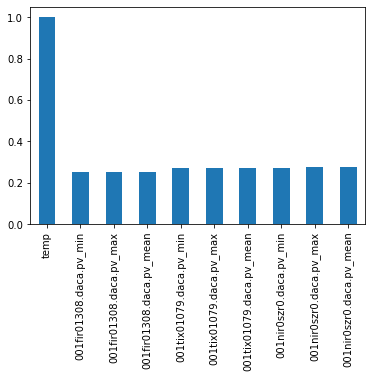

In [11]:
cor_col = get_correlated_cols(df)
df[cor_col].corrwith(df.temp).plot(kind='bar')

Dla wartości powyżej 25% otrzymujemy 9 takich zmiennych. Są to dane statystyczne (średnia, minimum, maksimum) dla: 
* WODA CHŁODZĄCA DO KOLEKTOR KZ8 `[m3/h]`
* TEMP.17 POD 2 WARSTWĄ WYMURÓWKI `[°C] `
* SUMARYCZNA MOC CIEPLNA ODEBRANA - CAŁKOWITA `[MW]`

## Wybór cech

Ze zredukowanego zbioru danych postaramy się wyodrębnić najistotniejsze cechy, stosując metody *Feature Selection*. 

### Variance Threshold

In [14]:
from sklearn.feature_selection import VarianceThreshold

X = df.drop(['index', 'temp', 'czas'], axis=1)
y = df.temp
sel = VarianceThreshold(threshold=.50) #not too high??
vt = sel.fit_transform(X)
cols = [X.columns[ix] for ix in sel.get_support(indices=True)]

X = X[X.columns[sel.get_support(indices=True)]]
X

,001tix01075.daca.pv_min,001tix01075.daca.pv_max,001tix01075.daca.pv_mean,001tix01074.daca.pv_min,001tix01074.daca.pv_max,001tix01074.daca.pv_mean,001tix01073.daca.pv_min,001tix01073.daca.pv_max,001tix01073.daca.pv_mean,001fir01311.daca.pv_min,...,001fir01313.daca.pv_mean,001tix01080.daca.pv_min,001tix01080.daca.pv_max,001tix01080.daca.pv_mean,001tix01070.daca.pv_min,001tix01070.daca.pv_max,001tix01070.daca.pv_mean,001uxm0rf01.daca.pv_min,001uxm0rf01.daca.pv_max,001uxm0rf01.daca.pv_mean
0,460.520729,460.571068,460.545898,407.281123,407.381743,407.331433,463.983696,464.059200,464.021448,110.359507,...,143.080296,426.955754,427.031288,426.993521,372.409594,372.473858,372.441726,92.092048,92.137028,92.105226
1,460.451847,460.519875,460.488440,407.161067,407.279418,407.222827,463.924624,463.982417,463.950939,110.460103,...,143.240823,426.878941,426.954475,426.916708,372.338630,372.408505,372.374947,92.091896,92.117310,92.105459
2,460.375080,460.450567,460.412823,407.033107,407.158934,407.096020,463.873446,463.923771,463.898608,110.437134,...,143.170006,426.802129,426.877663,426.839896,372.261863,372.337350,372.299606,92.081750,92.091896,92.087027
3,460.336696,460.412184,460.374440,406.969132,407.094954,407.032041,463.842943,463.898182,463.872507,110.286360,...,143.105688,426.763722,426.839256,426.801489,372.223479,372.298967,372.261223,92.084887,92.096837,92.090631
4,460.298313,460.373800,460.336057,406.905168,407.030973,406.968068,463.804536,463.872593,463.841150,110.286360,...,143.089269,426.725328,426.800850,426.763085,372.222839,372.260583,372.232435,92.081877,92.096837,92.090106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,458.587648,458.839305,458.713477,406.115147,406.316432,406.215790,449.170258,449.321295,449.245776,100.663786,...,138.606562,426.210359,426.336230,426.273295,375.011717,375.187868,375.099792,98.038125,98.057871,98.052434
11379,458.407225,458.583384,458.473679,405.947768,406.111736,406.016851,449.061462,449.167700,449.099093,100.661246,...,138.572225,426.129286,426.208224,426.156439,374.854959,375.008730,374.924107,98.058004,98.065827,98.061915
11380,458.437936,458.538602,458.488269,405.871016,405.946489,405.908752,449.061462,449.061462,449.061462,100.547147,...,138.545791,426.103682,426.128860,426.116271,374.752558,374.853253,374.802905,98.016144,98.067174,98.042315
11381,458.540308,458.610262,458.580274,405.801724,405.869737,405.833152,449.046529,449.061462,449.059158,100.537908,...,138.523873,426.089813,426.103256,426.093455,374.672560,374.750851,374.703960,98.016144,98.016144,98.016144


### Cechy wysoko skorelowane między sobą

Sprawdzamy parametry z wysokoą korelacją między sobą. W tym celu wygenerowano macierz górną trójkątną korelacji pararami, a następnie usunięto cechy o korelacji większej niż 0.99.<br>
**ZOSTAWIĆ CECHĘ Z WYŻSZĄ COR Z TARGETEM**

In [24]:
cor_matrix = X.corr().abs()
upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.99)]
df1 = X.drop(df[to_drop], axis=1)
df1.head()

,001uxm0rf02.daca.pv_mean,001txi01154.daca.pv_max,001fcx00241.pv_mean,001fcx00241.pv_std,001fir01308.daca.pv_max,001tir01362.daca.pv_min,001tir01362.daca.pv_max,001fir01315.daca.pv_mean,001tir01363.daca.pv_max,001tix01076.daca.pv_max,001nir0szr0.daca.pv_max,001nir0szr0.daca.pv_mean,001fir01307.daca.pv_mean,001tix01066.daca.pv_min,001tix01065.daca.pv_min,001tir01365.daca.pv_min,001uxm0rf03.daca.pv_max,001fcx00221.pv_max,001fcx00221.pv_mean,001fir01313.daca.pv_mean
0,92.045243,19.563539,21.711593,1.121972,112.588193,31.165436,31.747188,108.945748,30.976565,449.970680,15.199544,15.093809,108.507796,435.528665,455.811595,27.041597,92.402679,55.539378,54.978250,143.080296
1,92.068066,19.249583,20.397165,0.513838,112.942869,31.385416,31.587724,109.069018,31.416502,449.889662,15.244315,14.882378,109.585406,435.408563,455.786021,27.101087,92.405623,55.388218,54.985231,143.240823
2,92.075308,18.773905,20.982491,0.691608,112.801942,31.477088,31.638242,109.006159,31.476997,449.864058,14.633314,14.493241,109.539235,435.280557,455.747006,27.042486,92.410484,55.409648,54.977356,143.170006
3,92.074030,18.392569,21.728907,1.022219,112.740666,31.452425,31.638242,108.963363,31.405106,449.851256,14.509810,14.236155,109.318285,435.211656,455.695812,26.949647,92.410484,55.549354,54.986086,143.105688
4,92.072732,18.157581,22.668799,0.680601,112.876873,31.320126,31.616741,108.964504,31.381985,449.803290,14.225614,13.933084,109.462322,435.134873,455.644619,26.877040,92.410202,55.549354,54.988781,143.089269


### RFE

Następnie wykonujemy rekurencyjną eliminację cech (RFE) z walidacją krzyżową (cross-validation)

In [22]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

n_features = 20
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=20)
selector = rfe.fit(X, y)

X = X.iloc[:,selector.support_]
# column_names = list(X.columns) + ['Activity']
# X = df[column_names]
X

,001uxm0rf02.daca.pv_mean,001txi01154.daca.pv_max,001fcx00241.pv_mean,001fcx00241.pv_std,001fir01308.daca.pv_max,001tir01362.daca.pv_min,001tir01362.daca.pv_max,001fir01315.daca.pv_mean,001tir01363.daca.pv_max,001tix01076.daca.pv_max,001nir0szr0.daca.pv_max,001nir0szr0.daca.pv_mean,001fir01307.daca.pv_mean,001tix01066.daca.pv_min,001tix01065.daca.pv_min,001tir01365.daca.pv_min,001uxm0rf03.daca.pv_max,001fcx00221.pv_max,001fcx00221.pv_mean,001fir01313.daca.pv_mean
0,92.045243,19.563539,21.711593,1.121972,112.588193,31.165436,31.747188,108.945748,30.976565,449.970680,15.199544,15.093809,108.507796,435.528665,455.811595,27.041597,92.402679,55.539378,54.978250,143.080296
1,92.068066,19.249583,20.397165,0.513838,112.942869,31.385416,31.587724,109.069018,31.416502,449.889662,15.244315,14.882378,109.585406,435.408563,455.786021,27.101087,92.405623,55.388218,54.985231,143.240823
2,92.075308,18.773905,20.982491,0.691608,112.801942,31.477088,31.638242,109.006159,31.476997,449.864058,14.633314,14.493241,109.539235,435.280557,455.747006,27.042486,92.410484,55.409648,54.977356,143.170006
3,92.074030,18.392569,21.728907,1.022219,112.740666,31.452425,31.638242,108.963363,31.405106,449.851256,14.509810,14.236155,109.318285,435.211656,455.695812,26.949647,92.410484,55.549354,54.986086,143.105688
4,92.072732,18.157581,22.668799,0.680601,112.876873,31.320126,31.616741,108.964504,31.381985,449.803290,14.225614,13.933084,109.462322,435.134873,455.644619,26.877040,92.410202,55.549354,54.988781,143.089269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,98.130986,10.463656,31.573013,0.352512,98.686516,30.431211,31.278262,97.863882,28.436328,455.569489,17.086992,15.854022,102.719332,431.627741,449.701121,25.966789,98.257603,59.557007,58.890234,138.606562
11379,98.132891,10.444707,31.013085,0.610369,98.698634,30.543753,31.116696,97.838483,28.401008,455.364808,18.655348,17.150493,102.491660,431.532816,449.624354,25.931800,98.234558,59.593765,58.921295,138.572225
11380,98.137859,10.264627,28.500924,1.100790,98.634027,30.029215,30.807204,97.813730,28.460283,455.183791,16.527723,15.968507,102.080776,431.456049,449.532641,26.003282,98.221079,59.593630,58.892745,138.545791
11381,98.124154,9.841393,27.666920,0.345870,98.525028,30.263676,31.238192,97.799259,28.484248,455.055861,17.733470,16.376437,101.673674,431.371799,449.404635,26.049297,98.223638,59.425681,58.267232,138.523873


In [23]:
X.columns

Index(['001uxm0rf02.daca.pv_mean', '001txi01154.daca.pv_max',
       '001fcx00241.pv_mean', '001fcx00241.pv_std', '001fir01308.daca.pv_max',
       '001tir01362.daca.pv_min', '001tir01362.daca.pv_max',
       '001fir01315.daca.pv_mean', '001tir01363.daca.pv_max',
       '001tix01076.daca.pv_max', '001nir0szr0.daca.pv_max',
       '001nir0szr0.daca.pv_mean', '001fir01307.daca.pv_mean',
       '001tix01066.daca.pv_min', '001tix01065.daca.pv_min',
       '001tir01365.daca.pv_min', '001uxm0rf03.daca.pv_max',
       '001fcx00221.pv_max', '001fcx00221.pv_mean',
       '001fir01313.daca.pv_mean'],
      dtype='object')